Import Python Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset('titanic')
print(sns.__version__)



0.13.2


Make Matplotlib plots look like Seaborn style
Set Seaborn's default colors to the viridis palette

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")

In [3]:
# Display first few rows of the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Dataset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


✔ Summary Statistics

In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


✔ Missing Values

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Missing Value Visualization

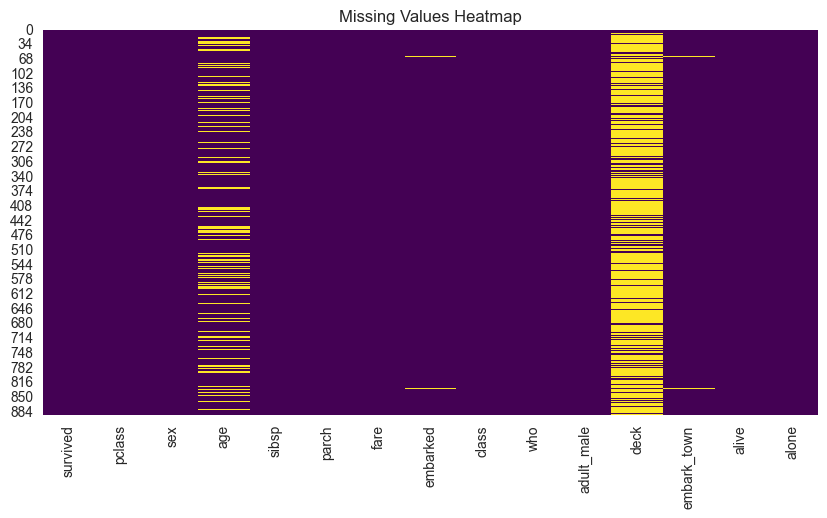

In [7]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False , cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()  

Univariate Analysis (Understanding Each Feature)
Survival Count

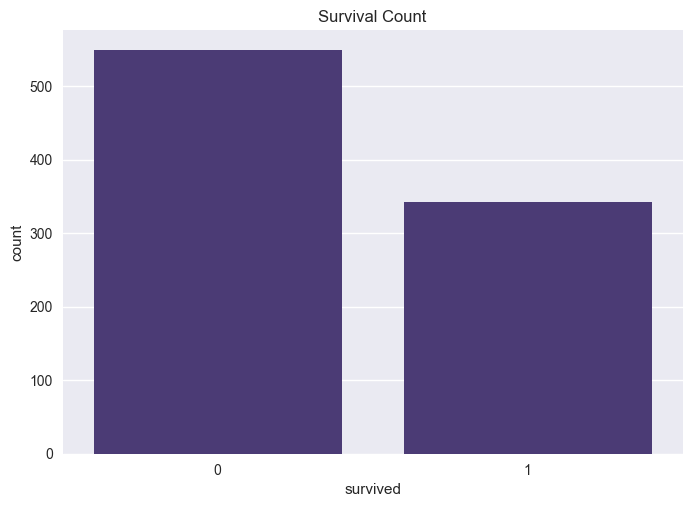

In [8]:
sns.countplot(data=df, x='survived')
plt.title("Survival Count")
plt.show()

Class Distribution

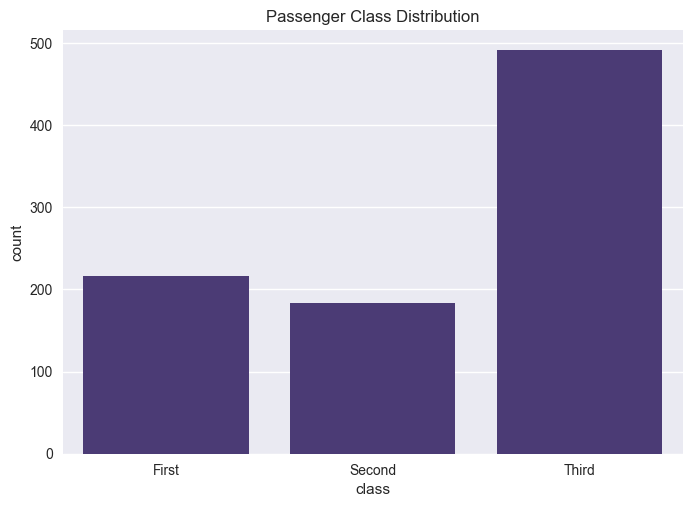

In [9]:
sns.countplot(data= df, x='class')
plt.title("Passenger Class Distribution")
plt.show()

Age distribution

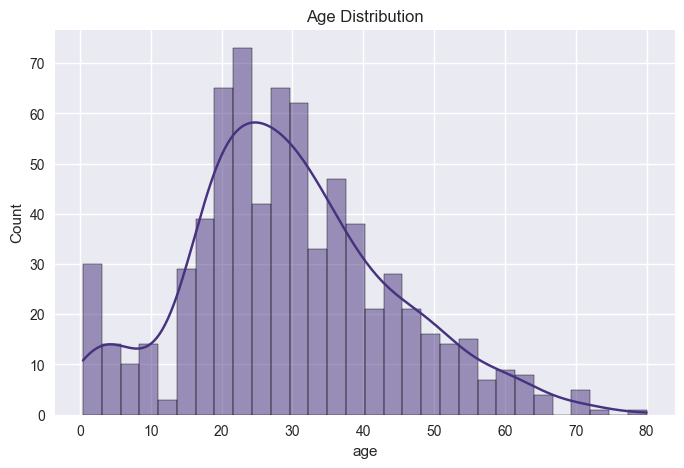

In [10]:
plt.figure(figsize=(8, 5))
#sns.histplot(df['age'], bins=30, kde=True)

sns.histplot(data= df, x='age', bins=30, kde=True)

plt.title("Age Distribution")
plt.show()

Fare Distribution

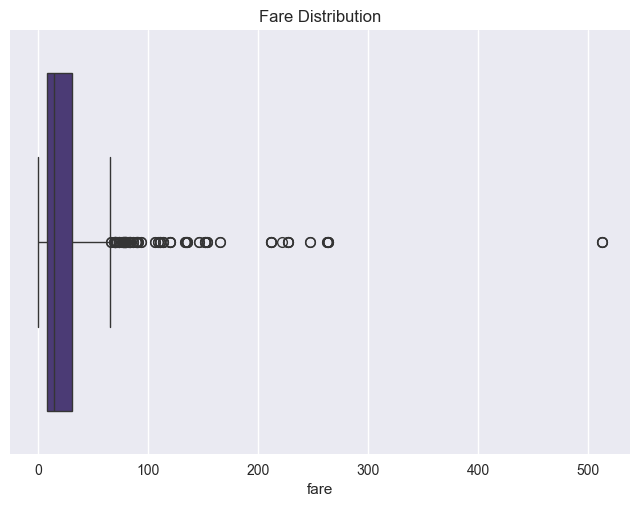

In [11]:
sns.boxplot(data=df, x='fare')
plt.title("Fare Distribution")
plt.show()

Bivariate Analysis (Feature Relationships)
Survival by Gender

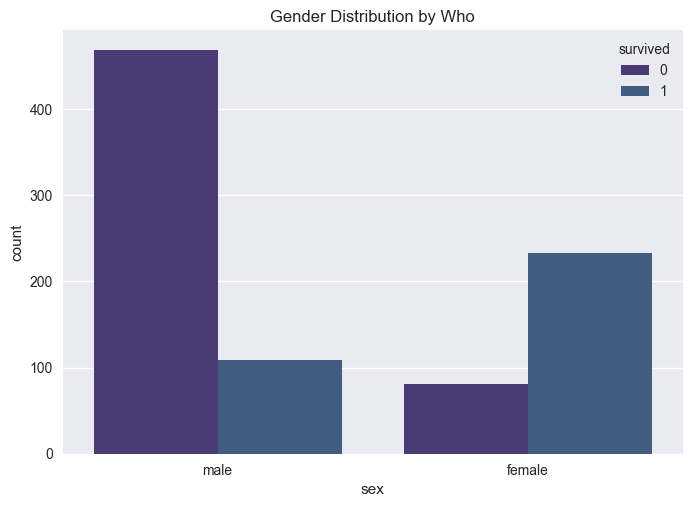

In [12]:
sns.countplot(data=df, x='sex', hue='survived')
plt.title("Gender Distribution by Who")
plt.show()

Survival by Class

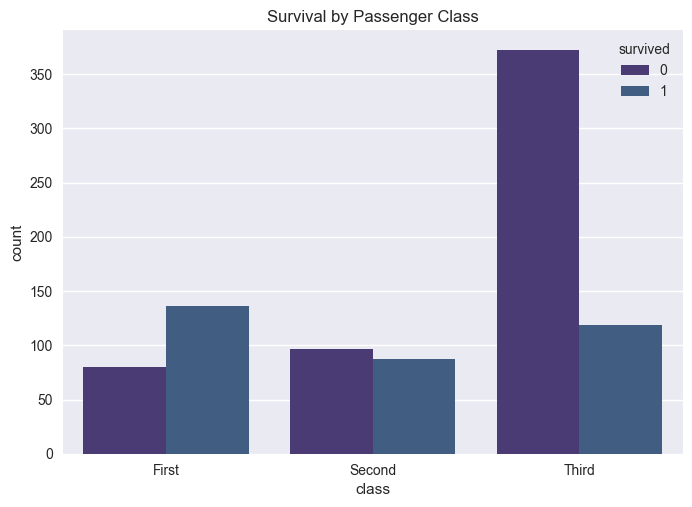

In [13]:
sns.countplot(data=df, x='class', hue='survived')
plt.title("Survival by Passenger Class")
plt.show()

Age vs Survival

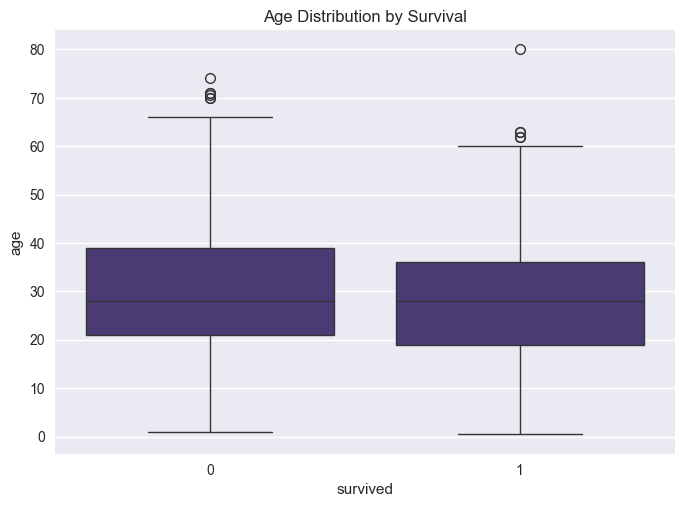

In [14]:
sns.boxplot(data=df, x='survived', y='age')
plt.title("Age Distribution by Survival")
plt.show()

Correlation Analysis (Numeric Features)

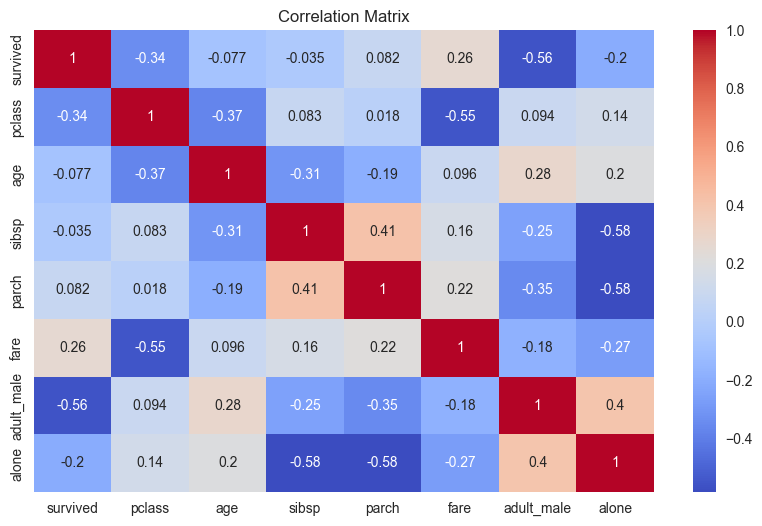

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Feature Engineering for Titanic Dataset (with Explanation + Code)
This section covers:
Handling missing values
Creating new features
Encoding categorical variables
Preparing the dataset for modeling

Handling Missing Values (Imputation)

In [16]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [17]:
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
df['age']= df['age'].fillna(df['age'].median())

df['embarked']= df['embarked'].fillna(df['embarked'].mode()[0]) 

df['deck']= df['deck'].cat.add_categories('Unknown')
df['deck']= df['deck'].fillna('Unknown')

df['embark_town']= df['embark_town'].fillna(df['embark_town'].mode()[0])    

In [19]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [20]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Creating New Features
Feature engineering creates new variables that help models learn patterns better.
Family Size (✔ Explanation:
Passengers traveling alone had a lower survival rate.
This feature captures that information.)

In [21]:
df['family_size'] = df['sibsp'] + df['parch'] + 1

Is Alone 
✔ Explanation:
Binary feature:

1 → passenger traveling alone

0 → traveling with family

In [22]:
df['is_alone'] = (df['family_size'] == 1).astype(int)

Age Binning
df['age_bin'] = pd.cut(
    df['age'],
    bins=[0, 12, 20, 40, 60, 100],
    labels=['child', 'teen', 'adult', 'middle_aged', 'senior']
)


✔ Explanation:
Converting age into categories helps tree-based models.

In [23]:
df['age_bin']= pd.cut(
    df['age'], 
    bins=[0,12,20,40,60,80], 
    labels=['Child','Teenager','Adult','Middle_Aged','Senior'])   

Fare Binning, ✔ Explanation: quantile-based binning
Fare distribution is heavily skewed; binning makes it easier for ML models to interpret.
Divide the data into 4 quantiles
Each bin will contain approximately 25% of passengers
✔️ labels=['low','medium','high','very_high']
These names replace the numeric bin numbers.

In [24]:
df['fare_bin']= pd.qcut(
    df['fare'],
    q=4,
    labels=['Low','Medium','High','Very_High'],
)

In [25]:


df['deck'] = df['deck'].astype('category')

df.dtypes


survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
family_size       int64
is_alone          int64
age_bin        category
fare_bin       category
dtype: object

Encoding Categorical Features

Because ML models only accept numbers, we convert categories into numeric columns.

One-Hot Encoding (best for Titanic)
But since you drop_first=True, only one column is kept: prevents multicollinearity (dummy variable trap).


In [26]:
df_encoded = pd.get_dummies(
    df,
    columns=['sex', 'embarked', 'class', 'deck', 'who', 'adult_male', 'alive', 'alone', 'fare_bin', 'age_bin'],
    drop_first=True
)

Final Dataset Ready for Modeling


In [27]:
df_encoded.head()

,survived,pclass,age,sibsp,parch,fare,embark_town,family_size,is_alone,sex_male,...,adult_male_True,alive_yes,alone_True,fare_bin_Medium,fare_bin_High,fare_bin_Very_High,age_bin_Teenager,age_bin_Adult,age_bin_Middle_Aged,age_bin_Senior
0,0,3,22.0,1,0,7.2500,Southampton,2,0,True,...,True,False,False,False,False,False,False,True,False,False
1,1,1,38.0,1,0,71.2833,Cherbourg,2,0,False,...,False,True,False,False,False,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,Southampton,1,1,False,...,False,True,True,True,False,False,False,True,False,False
3,1,1,35.0,1,0,53.1000,Southampton,2,0,False,...,False,True,False,False,False,True,False,True,False,False
4,0,3,35.0,0,0,8.0500,Southampton,1,1,True,...,True,False,True,True,False,False,False,True,False,False


Recommendation: Drop embarked_town
Prefer keeping embarked (C/S/Q) since it is cleaner.
# Remove leakage, redundant, or duplicate columns





In [28]:


cols_to_drop = ['embark_town', 'alive', 'alone']
df_final= df_encoded.drop(columns=cols_to_drop, errors='ignore')
df_final.head()

,survived,pclass,age,sibsp,parch,fare,family_size,is_alone,sex_male,embarked_Q,...,adult_male_True,alive_yes,alone_True,fare_bin_Medium,fare_bin_High,fare_bin_Very_High,age_bin_Teenager,age_bin_Adult,age_bin_Middle_Aged,age_bin_Senior
0,0,3,22.0,1,0,7.2500,2,0,True,False,...,True,False,False,False,False,False,False,True,False,False
1,1,1,38.0,1,0,71.2833,2,0,False,False,...,False,True,False,False,False,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,1,1,False,False,...,False,True,True,True,False,False,False,True,False,False
3,1,1,35.0,1,0,53.1000,2,0,False,False,...,False,True,False,False,False,True,False,True,False,False
4,0,3,35.0,0,0,8.0500,1,1,True,False,...,True,False,True,True,False,False,False,True,False,False


Best practice: Convert ALL boolean columns to 0/1
After this, booleans become 0 and 1 — safe for ALL machine learning models.

In [29]:
df_final2 = df_final.astype({col: 'int' for col in df_final.select_dtypes('bool').columns})
df_final2.head()

,survived,pclass,age,sibsp,parch,fare,family_size,is_alone,sex_male,embarked_Q,...,adult_male_True,alive_yes,alone_True,fare_bin_Medium,fare_bin_High,fare_bin_Very_High,age_bin_Teenager,age_bin_Adult,age_bin_Middle_Aged,age_bin_Senior
0,0,3,22.0,1,0,7.2500,2,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,1,1,38.0,1,0,71.2833,2,0,0,0,...,0,1,0,0,0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,...,0,1,1,1,0,0,0,1,0,0
3,1,1,35.0,1,0,53.1000,2,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,1,1,0,...,1,0,1,1,0,0,0,1,0,0


Remove leakage columns


In [30]:
df_final2 = df_final2.drop(columns=['alive_yes', 'alone_True', 'adult_male_True'], errors='ignore')

df_final2.head()

,survived,pclass,age,sibsp,parch,fare,family_size,is_alone,sex_male,embarked_Q,...,deck_Unknown,who_man,who_woman,fare_bin_Medium,fare_bin_High,fare_bin_Very_High,age_bin_Teenager,age_bin_Adult,age_bin_Middle_Aged,age_bin_Senior
0,0,3,22.0,1,0,7.2500,2,0,1,0,...,1,1,0,0,0,0,0,1,0,0
1,1,1,38.0,1,0,71.2833,2,0,0,0,...,0,0,1,0,0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,1,0,0,...,1,0,1,1,0,0,0,1,0,0
3,1,1,35.0,1,0,53.1000,2,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,1,1,0,...,1,1,0,1,0,0,0,1,0,0


In [31]:
df_final2 = df_final2.drop(columns=['who_man', 'who_woman', 'is_alone'], errors='ignore')
df_final2.head()

,survived,pclass,age,sibsp,parch,fare,family_size,sex_male,embarked_Q,embarked_S,...,deck_F,deck_G,deck_Unknown,fare_bin_Medium,fare_bin_High,fare_bin_Very_High,age_bin_Teenager,age_bin_Adult,age_bin_Middle_Aged,age_bin_Senior
0,0,3,22.0,1,0,7.2500,2,1,0,1,...,0,0,1,0,0,0,0,1,0,0
1,1,1,38.0,1,0,71.2833,2,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1,...,0,0,1,1,0,0,0,1,0,0
3,1,1,35.0,1,0,53.1000,2,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,1,0,1,...,0,0,1,1,0,0,0,1,0,0


No scaling needed
For tree models (RandomForest, XGBoost, GradientBoosting):
Scale age, fare (continuous variables)
For logistic regression, SVM, neural networks:

Examples:Age, Fare, Income,Temperature ,Weight,continuous measurements

No scaling for discrete count variables:Number of siblings, Number of children, Family size

Download the dataset

In [32]:
df_final2.to_csv("titanic_cleaned.csv", index=False)